In [168]:
!python -m pip install --upgrade pip
!pip3 uninstall d2l -y
!pip3 uninstall tensorflow -y
!pip3 uninstall numpy -y
!pip3 uninstall matplotlib -y
!pip3 install d2l
!pip3 install tensorflow
!pip3 install pandas==1.3.5
!pip3 install matplotlib
!pip3 install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: d2l 0.17.6
Uninstalling d2l-0.17.6:
  Successfully uninstalled d2l-0.17.6
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Successfully uninstalled matplotlib-3.5.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached d2l-0.17.6-py3-none-any.whl (112 kB)
  Using cached numpy-1.21.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
  Using cached matplotlib-3.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
  Using cached pandas-1.2.4-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: pandas
    Fou

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires pandas>=1.3.0, but you have pandas 1.2.4 which is incompatible.
d2l 0.17.6 requires numpy==1.21.5, but you have numpy 1.23.5 which is incompatible.
mizani 0.8.1 requires pandas>=1.3.5, but you have pandas 1.2.4 which is incompatible.
plotnine 0.10.1 requires pandas>=1.3.5, but you have pandas 1.2.4 which is incompatible.
xarray 2022.12.0 requires pand

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.6 requires numpy==1.21.5, but you have numpy 1.23.5 which is incompatible.
d2l 0.17.6 requires pandas==1.2.4, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires requests>=2.27.0, but you have requests 2.25.1 which is incompatible.
yfinance 0.2.18 requires requests>=2.26, but you have requests 2.25.1 which is incompatible.
Looking in indexes: https:

In [277]:
import time
import numpy as np
import inspect
import collections
from IPython import display
import tensorflow as tf

def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

class HyperParameters:
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        frame = inspect.currentframe().f_back
        _, _, _, local_vars = inspect.getargvalues(frame)
        self.hparams = {k:v for k, v in local_vars.items()
                        if k not in set(ignore+['self']) and not k.startswith('_')}
        for k, v in self.hparams.items():
            setattr(self, k, v)

In [278]:
class ProgressBoard(HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        Point = collections.namedtuple('Point', ['x', 'y'])
        if not hasattr(self, 'raw_points'):
            self.raw_points = collections.OrderedDict()
            self.data = collections.OrderedDict()
        if label not in self.raw_points:
            self.raw_points[label] = []
            self.data[label] = []
        points = self.raw_points[label]
        line = self.data[label]
        points.append(Point(x, y))
        if len(points) != every_n:
            return
        mean = lambda x: sum(x) / len(x)
        line.append(Point(mean([p.x for p in points]),
                          mean([p.y for p in points])))
        points.clear()
        if not self.display:
            return
        d2l.use_svg_display()
        if self.fig is None:
            self.fig = d2l.plt.figure(figsize=self.figsize)
        plt_lines, labels = [], []
        for (k, v), ls, color in zip(self.data.items(), self.ls, self.colors):
            plt_lines.append(d2l.plt.plot([p.x for p in v], [p.y for p in v],
                                          linestyle=ls, color=color)[0])
            labels.append(k)
        axes = self.axes if self.axes else d2l.plt.gca()
        if self.xlim: axes.set_xlim(self.xlim)
        if self.ylim: axes.set_ylim(self.ylim)
        if not self.xlabel: self.xlabel = self.x
        axes.set_xlabel(self.xlabel)
        axes.set_ylabel(self.ylabel)
        axes.set_xscale(self.xscale)
        axes.set_yscale(self.yscale)
        axes.legend(plt_lines, labels)
        display.display(self.fig)
        display.clear_output(wait=True)

In [279]:
class Module(tf.keras.Model, HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()
        self.training = None

    def loss(self, y_hat, y):
        return cross_entropy(y_hat, y)

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def call(self, X, *args, **kwargs):
        if kwargs and "training" in kwargs:
            self.training = kwargs['training']
        return self.forward(X, *args)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.numpy(), (
            'train_' if train else 'val_') + key, every_n=int(n))
    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

class DataModule(HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data'):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplemented

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

class Trainer(HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.save_hyperparameters()
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        self.model.training = True
        for batch in self.train_dataloader:
            with tf.GradientTape() as tape:
                loss = self.model.training_step(self.prepare_batch(batch))
            grads = tape.gradient(loss, self.model.trainable_variables)
            if self.gradient_clip_val > 0:
                grads = self.clip_gradients(self.gradient_clip_val, grads)
            self.optim.apply_gradients(zip(grads, self.model.trainable_variables))
            self.train_batch_idx += 1
        if self.val_dataloader is None:
            return
        self.model.training = False
        for batch in self.val_dataloader:
            self.model.validation_step(self.prepare_batch(batch))
            self.val_batch_idx += 1
    def prepare_batch(self, batch):
        return batch

In [280]:
class Classifier(Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

## 7.1. **From Fully Connected Layers to Convolutions**

#### 7.1.1. Invariance

Object의 위치가 바뀌어도 똑같은 Class의 Object라고 인식해야 한다. 이걸 Translation Invariance라고 한다.

Translation => 이동

Invariance => 불변

#### 7.1.3. Convolutions

Convolution => 합성곱 => input X의 Translation이 일어나면 합성곱 안의 representation에서도 Translation이 일어남

이는 X의 위치에 구애받지 않는다

$[\mathbf{H}]_{i, j} = u + \sum_a\sum_b [\mathbf{V}]_{a, b}  [\mathbf{X}]_{i+a, j+b}$

실제 구현은 Kernel이 움직이면서 합성곱을 생성함으로써 위치에 구애받지 않게 된다.

2차원 텐서에 대한 Convolution

$(f * g)(i, j) = \sum_a\sum_b f(a, b) g(i-a, j-b)$

## 7.2. **Convolutions for Images**

In [281]:
import tensorflow as tf

In [282]:
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = tf.Variable(tf.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1)))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j].assign(tf.reduce_sum(
                X[i: i + h, j: j + w] * K))
    return Y

Input과 Kernel을 가지고 Cross Correlation을 구하는 메소드이다.

In [283]:
X = tf.constant([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = tf.constant([[0.0, 1.0], [2.0, 3.0]])
corr2d(X, K)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[19., 25.],
       [37., 43.]], dtype=float32)>

#### 7.2.2. Convolutional Layers

In [284]:
class Conv2D(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, kernel_size):
        initializer = tf.random_normal_initializer()
        self.weight = self.add_weight(name='w', shape=kernel_size,
                                      initializer=initializer)
        self.bias = self.add_weight(name='b', shape=(1, ),
                                    initializer=initializer)

    def call(self, inputs):
        return corr2d(inputs, self.weight) + self.bias

Convolution Layer를 정의하였다. 기억 상 keras에도 따로 정의되어 있는 것으로 알고 있다.

#### 7.2.3. Object Edge Detection in Images

In [285]:
X = tf.Variable(tf.ones((6, 8)))
X[:, 2:6].assign(tf.zeros(X[:, 2:6].shape))
X

<tf.Variable 'Variable:0' shape=(6, 8) dtype=float32, numpy=
array([[1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 1., 1.]], dtype=float32)>

In [286]:
K = tf.constant([[1.0, -1.0]])

In [287]:
Y = corr2d(X, K)
Y

<tf.Variable 'Variable:0' shape=(6, 7) dtype=float32, numpy=
array([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0.,  0., -1.,  0.]], dtype=float32)>

In [288]:
corr2d(tf.transpose(X), K)

<tf.Variable 'Variable:0' shape=(8, 5) dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

#### 7.2.4. Learning a Kernel

In [289]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = tf.keras.layers.Conv2D(1, (1, 2), use_bias=False)

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example, height, width, channel), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = tf.reshape(X, (1, 6, 8, 1))
Y = tf.reshape(Y, (1, 6, 7, 1))
lr = 3e-2  # Learning rate

Y_hat = conv2d(X)
for i in range(10):
    with tf.GradientTape(watch_accessed_variables=False) as g:
        g.watch(conv2d.weights[0])
        Y_hat = conv2d(X)
        l = (abs(Y_hat - Y)) ** 2
        # Update the kernel
        update = tf.multiply(lr, g.gradient(l, conv2d.weights[0]))
        weights = conv2d.get_weights()
        weights[0] = conv2d.weights[0] - update
        conv2d.set_weights(weights)
        if (i + 1) % 2 == 0:
            print(f'epoch {i + 1}, loss {tf.reduce_sum(l):.3f}')

epoch 2, loss 33.890
epoch 4, loss 11.632
epoch 6, loss 4.387
epoch 8, loss 1.734
epoch 10, loss 0.699


In [290]:
tf.reshape(conv2d.get_weights()[0], (1, 2))

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.89822  , -1.0700567]], dtype=float32)>

## 7.3. **Padding and Stride**


#### 7.3.1. Padding

Input과 Output의 차원이 같도록 Padding을 추가한다.

In [291]:
# We define a helper function to calculate convolutions. It initializes
# the convolutional layer weights and performs corresponding dimensionality
# elevations and reductions on the input and output
def comp_conv2d(conv2d, X):
    # (1, 1) indicates that batch size and the number of channels are both 1
    X = tf.reshape(X, (1, ) + X.shape + (1, ))
    Y = conv2d(X)
    # Strip the first two dimensions: examples and channels
    return tf.reshape(Y, Y.shape[1:3])
# 1 row and column is padded on either side, so a total of 2 rows or columns
# are added
conv2d = tf.keras.layers.Conv2D(1, kernel_size=3, padding='same')
X = tf.random.uniform(shape=(8, 8))
comp_conv2d(conv2d, X).shape

TensorShape([8, 8])

In [292]:
# We use a convolution kernel with height 5 and width 3. The padding on
# either side of the height and width are 2 and 1, respectively
conv2d = tf.keras.layers.Conv2D(1, kernel_size=(5, 3), padding='same')
comp_conv2d(conv2d, X).shape

TensorShape([8, 8])

#### 7.3.2. Stride

Kernel이 움직일 때 얼만큼 움직일 것인가? 어떻게 움직여야 Input과 Output의 차원이 같아질까?

In [293]:
conv2d = tf.keras.layers.Conv2D(1, kernel_size=3, padding='same', strides=2)
comp_conv2d(conv2d, X).shape

TensorShape([4, 4])

In [294]:
conv2d = tf.keras.layers.Conv2D(1, kernel_size=(3,5), padding='valid',
                                strides=(3, 4))
comp_conv2d(conv2d, X).shape

TensorShape([2, 1])

## 7.4. **Multiple Input and Multiple Output Channels**

사진 파일은 대개 RGB, 이렇게 채널이 여러 개 있다. 채널마다의 Kernel을 부여해서 각각 Convolution을 구한 후 더하면 Multiple Channel에 대해 Handling할 수 있다.

#### 7.4.1. Multiple Input Channels

In [295]:
def corr2d_multi_in(X, K):
    # Iterate through the 0th dimension (channel) of K first, then add them up
    return tf.reduce_sum([corr2d(x, k) for x, k in zip(X, K)], axis=0)

In [296]:
X = tf.constant([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
               [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = tf.constant([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

corr2d_multi_in(X, K)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 56.,  72.],
       [104., 120.]], dtype=float32)>

2개의 채널을 가진 X에 대해 2개의 kernel로 구성된 K에 대해 Convolution을 진행한 결과이다.

#### 7.4.2. Multiple Output Channels

In [297]:
def corr2d_multi_in_out(X, K):
    # Iterate through the 0th dimension of K, and each time, perform
    # cross-correlation operations with input X. All of the results are
    # stacked together
    return tf.stack([corr2d_multi_in(X, k) for k in K], 0)

7.4.1절에서 잘 보면 더하기 전에 채널마다 Output이 나오는 것을 확인할 수 있다. 따라서 reduce_sum을 빼면 Multiple output을 구현할 수 있다.

In [298]:
K = tf.stack((K, K + 1, K + 2), 0)
K.shape

TensorShape([3, 2, 2, 2])

In [299]:
corr2d_multi_in_out(X, K)

<tf.Tensor: shape=(3, 2, 2), dtype=float32, numpy=
array([[[ 56.,  72.],
        [104., 120.]],

       [[ 76., 100.],
        [148., 172.]],

       [[ 96., 128.],
        [192., 224.]]], dtype=float32)>

#### 7.4.3. $1 \times 1$ Convolutional Layer 

In [300]:
def corr2d_multi_in_out_1x1(X, K):
    c_i, h, w = X.shape
    c_o = K.shape[0]
    X = tf.reshape(X, (c_i, h * w))
    K = tf.reshape(K, (c_o, c_i))
    # Matrix multiplication in the fully connected layer
    Y = tf.matmul(K, X)
    return tf.reshape(Y, (c_o, h, w))

In [301]:
X = tf.random.normal((3, 3, 3), 0, 1)
K = tf.random.normal((2, 3, 1, 1), 0, 1)
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)
assert float(tf.reduce_sum(tf.abs(Y1 - Y2))) < 1e-6

## 7.5. **Pooling**

Kernel 없이 Window에 따라 값을 도출해냄

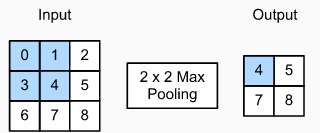

$\begin{split}\max(0, 1, 3, 4)=4,\\
\max(1, 2, 4, 5)=5,\\
\max(3, 4, 6, 7)=7,\\
\max(4, 5, 7, 8)=8.\\\end{split}$

In [302]:
import tensorflow as tf


def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = tf.Variable(tf.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w +1)))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j].assign(tf.reduce_max(X[i: i + p_h, j: j + p_w]))
            elif mode =='avg':
                Y[i, j].assign(tf.reduce_mean(X[i: i + p_h, j: j + p_w]))
    return Y

In [303]:
X = tf.constant([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[4., 5.],
       [7., 8.]], dtype=float32)>

In [304]:
pool2d(X, (2, 2), 'avg')

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

Window의 최댓값을 리턴하는 Max-Pooling, Window의 평균값을 리턴하는 Avg-Pooling이 있다.

#### 7.5.2. Padding and Stride

Convolution의 그것과 유사하게 원하는 output 모양을 만들기 위해 Padding을 추가한다.

Keras에 Pooling 역시 구현이 되어있다.

In [305]:
X = tf.reshape(tf.range(16, dtype=tf.float32), (1, 4, 4, 1))
X

<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.]],

        [[ 4.],
         [ 5.],
         [ 6.],
         [ 7.]],

        [[ 8.],
         [ 9.],
         [10.],
         [11.]],

        [[12.],
         [13.],
         [14.],
         [15.]]]], dtype=float32)>

In [306]:
pool2d = tf.keras.layers.MaxPool2D(pool_size=[3, 3])
# Pooling has no model parameters, hence it needs no initialization
pool2d(X)

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[10.]]]], dtype=float32)>

In [307]:
paddings = tf.constant([[0, 0], [1,0], [1,0], [0,0]])
X_Padded = X
pool2d = tf.keras.layers.MaxPool2D(pool_size=[3, 3], padding='valid',
                                   strides=2)
pool2d(X_Padded)

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[10.]]]], dtype=float32)>

#### 7.5.3. Multiple Channels

TF Framework는 Channel 개수가 차원의 마지막 축에 해당한다.

Multiple Channels역시 Convolution의 그것과 유사하다.

In [308]:
# Concatenate along `dim=3` due to channels-last syntax
X = tf.concat([X, X + 1], 3)
X

<tf.Tensor: shape=(1, 4, 4, 2), dtype=float32, numpy=
array([[[[ 0.,  1.],
         [ 1.,  2.],
         [ 2.,  3.],
         [ 3.,  4.]],

        [[ 4.,  5.],
         [ 5.,  6.],
         [ 6.,  7.],
         [ 7.,  8.]],

        [[ 8.,  9.],
         [ 9., 10.],
         [10., 11.],
         [11., 12.]],

        [[12., 13.],
         [13., 14.],
         [14., 15.],
         [15., 16.]]]], dtype=float32)>

In [309]:
paddings = tf.constant([[0, 0], [1,0], [1,0], [0,0]])
X_padded = tf.pad(X, paddings, "CONSTANT")
pool2d = tf.keras.layers.MaxPool2D(pool_size=[3, 3], padding='valid',
                                   strides=2)
pool2d(X_padded)

<tf.Tensor: shape=(1, 2, 2, 2), dtype=float32, numpy=
array([[[[ 5.,  6.],
         [ 7.,  8.]],

        [[13., 14.],
         [15., 16.]]]], dtype=float32)>

## 7.6. **Convolutional Neural Networks (LeNet)**

LeNet, 그 중 LeNet-5는 Convolution-Pooling Layer 두개가 있는 레이어 파트와, Dense 세 개가 있는 레이어 파트로 구성된다.

Convolution Layer는 Convolution-Sigmoid-Pooling 으로 이루어진다.
LeNet은 28*28 필기체 숫자 이미지를 숫자 당 약 1%의 오차율로 예측한다고 한다.

In [310]:
class LeNet(Classifier):
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=6, kernel_size=5,
                                   activation='sigmoid', padding='same'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Conv2D(filters=16, kernel_size=5,
                                   activation='sigmoid'),
            tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='sigmoid'),
            tf.keras.layers.Dense(84, activation='sigmoid'),
            tf.keras.layers.Dense(num_classes)])

In [311]:
@add_to_class(Classifier)
def layer_summary(self, X_shape):
    X = tf.random.normal(X_shape)
    for layer in self.net.layers:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)

model = LeNet()
model.layer_summary((1, 28, 28, 1))

Conv2D output shape:	 (1, 28, 28, 6)
AveragePooling2D output shape:	 (1, 14, 14, 6)
Conv2D output shape:	 (1, 10, 10, 16)
AveragePooling2D output shape:	 (1, 5, 5, 16)
Flatten output shape:	 (1, 400)
Dense output shape:	 (1, 120)
Dense output shape:	 (1, 84)
Dense output shape:	 (1, 10)
